# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# URL for GET requests to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List for holding reponse information
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []


# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")

Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | santa cruz
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | zalantun
Processing Record 8 of Set 1 | sarakhs
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | te anau
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | mashhad
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | maku
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | skjervoy
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | illoqqor

Processing Record 35 of Set 4 | vila franca do campo
Processing Record 36 of Set 4 | coihaique
Processing Record 37 of Set 4 | virginia beach
Processing Record 38 of Set 4 | lodeynoye pole
Processing Record 39 of Set 4 | port lincoln
Processing Record 40 of Set 4 | esik
Processing Record 41 of Set 4 | tarudant
City not found. Skipping...
Processing Record 42 of Set 4 | garowe
Processing Record 43 of Set 4 | tocache
Processing Record 44 of Set 4 | douglas
Processing Record 45 of Set 4 | krasnoselkup
Processing Record 46 of Set 4 | maragogi
Processing Record 47 of Set 4 | vibo valentia
Processing Record 48 of Set 4 | hamilton
Processing Record 49 of Set 4 | ixtapa
Processing Record 50 of Set 4 | vardo
Processing Record 1 of Set 5 | charters towers
Processing Record 2 of Set 5 | stege
Processing Record 3 of Set 5 | tubmanburg
Processing Record 4 of Set 5 | port moresby
Processing Record 5 of Set 5 | port macquarie
Processing Record 6 of Set 5 | nortelandia
Processing Record 7 of Set 5 | t

Processing Record 25 of Set 8 | laguna
Processing Record 26 of Set 8 | janow lubelski
Processing Record 27 of Set 8 | asau
Processing Record 28 of Set 8 | porto novo
Processing Record 29 of Set 8 | hasaki
Processing Record 30 of Set 8 | san joaquin
Processing Record 31 of Set 8 | thyolo
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | rungata
City not found. Skipping...
Processing Record 34 of Set 8 | aksu
Processing Record 35 of Set 8 | bloomingdale
Processing Record 36 of Set 8 | katihar
Processing Record 37 of Set 8 | piranshahr
Processing Record 38 of Set 8 | ambon
Processing Record 39 of Set 8 | nacala
Processing Record 40 of Set 8 | kushima
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | oksfjord
Processing Record 43 of Set 8 | sistranda
Processing Record 44 of Set 8 | slonim
Processing Record 45 of Set 8 | bokspits
City not found. Skipping...
Processing Record 46 of Set 8 | meghri
Processing Record 47 of Set 8 | krasnyy chikoy
Processi

Processing Record 11 of Set 12 | nenjiang
Processing Record 12 of Set 12 | kars
Processing Record 13 of Set 12 | nakhon phanom
Processing Record 14 of Set 12 | ajtos
Processing Record 15 of Set 12 | ryotsu
Processing Record 16 of Set 12 | cheney
Processing Record 17 of Set 12 | pacific grove
Processing Record 18 of Set 12 | banda aceh
Processing Record 19 of Set 12 | high level
Processing Record 20 of Set 12 | hervey bay
Processing Record 21 of Set 12 | oshkosh
Processing Record 22 of Set 12 | surt
Processing Record 23 of Set 12 | novikovo
Processing Record 24 of Set 12 | bojnurd
Processing Record 25 of Set 12 | khandbari
Processing Record 26 of Set 12 | porto
Processing Record 27 of Set 12 | floresta
Processing Record 28 of Set 12 | isangel
Processing Record 29 of Set 12 | canavieiras
Processing Record 30 of Set 12 | cap malheureux
Processing Record 31 of Set 12 | komsomolskiy
Processing Record 32 of Set 12 | vao
Processing Record 33 of Set 12 | vila velha
Processing Record 34 of Set 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
cities_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

In [6]:
# Make sure data is clean and remove any data not clean:

# Step 1: Check if there is any cities that were skipped because they could not return any response from OpenWeatherMap API
print(f'Number of cities acquired from citipy: {len(cities)} cities')
print(f'Check statistics after calling OpenWeatherMap API:\n{cities_df.count()}')
num_of_unclean_data = len(cities) - len(cities_df['City'])
print(f'-----> Number of NOT AVAILABLE data: { num_of_unclean_data }')
                                                
# Step 2: Remove all 'Not available' data (cities that were skipped because they could not return any response from OpenWeatherMap API)
clean_cities_df = cities_df.dropna(how="any")

# Step 3: Show statistics of clean data
print(f'Check statistics after cleaning data from the result of calling OpenWeatherMap API: {cities_df.count()}')

Number of cities acquired from citipy: 617 cities
Check statistics after calling OpenWeatherMap API:
City          617
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64
-----> Number of NOT AVAILABLE data: 0
Check statistics after cleaning data from the result of calling OpenWeatherMap API: City          617
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64


In [7]:
# Display sample data
clean_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,67.14,63.0,75.0,4.61,ZA,1.675011e+09
1,cherskiy,68.7500,161.3000,-14.40,98.0,77.0,1.77,RU,1.675011e+09
2,kodiak,57.7900,-152.4072,35.11,100.0,100.0,0.00,US,1.675011e+09
3,santa cruz,-17.8000,-63.1667,82.45,74.0,75.0,14.97,BO,1.675011e+09
4,rikitea,-23.1203,-134.9692,78.55,74.0,77.0,10.87,PF,1.675011e+09


In [8]:
# Export the City_Data into a csv
clean_cities_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# # Read saved data
clean_cities_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
clean_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,67.14,63.0,75.0,4.61,ZA,1.675011e+09
1,cherskiy,68.7500,161.3000,-14.40,98.0,77.0,1.77,RU,1.675011e+09
2,kodiak,57.7900,-152.4072,35.11,100.0,100.0,0.00,US,1.675011e+09
3,santa cruz,-17.8000,-63.1667,82.45,74.0,75.0,14.97,BO,1.675011e+09
4,rikitea,-23.1203,-134.9692,78.55,74.0,77.0,10.87,PF,1.675011e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

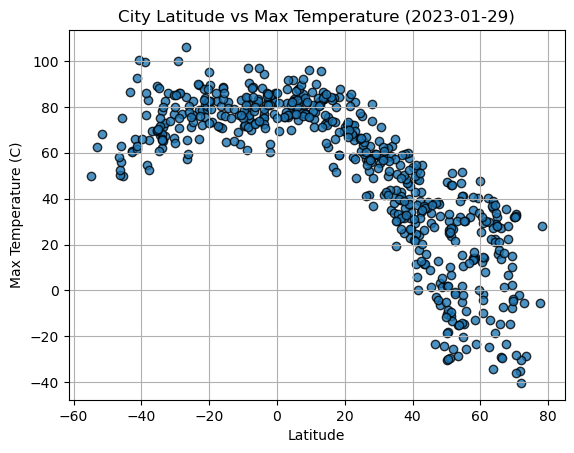

In [10]:
# Build scatter plot for latitude vs. temperature
x_axis_lats = clean_cities_df['Lat']
y_axis_max_temps = clean_cities_df['Max Temp']

plt.scatter(x_axis_lats,
            y_axis_max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
date_now = datetime.date(datetime.now())
plt.title(f'City Latitude vs Max Temperature ({date_now})')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

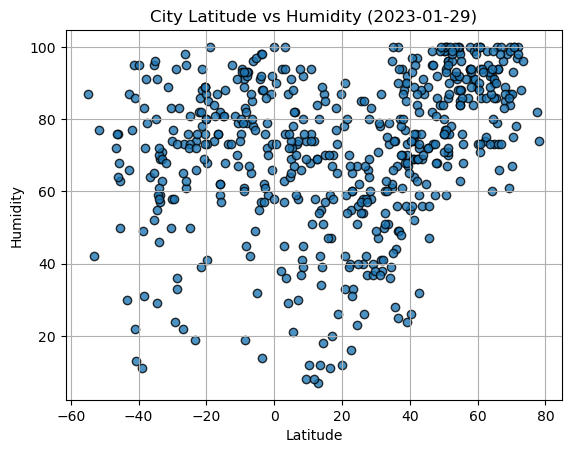

In [11]:
# Build the scatter plots for latitude vs. humidity
x_axis_lats = clean_cities_df['Lat']
y_axis_humidity = clean_cities_df['Humidity']

plt.scatter(x_axis_lats,
            y_axis_humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
date_now = datetime.date(datetime.now())
plt.title(f'City Latitude vs Humidity ({date_now})')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

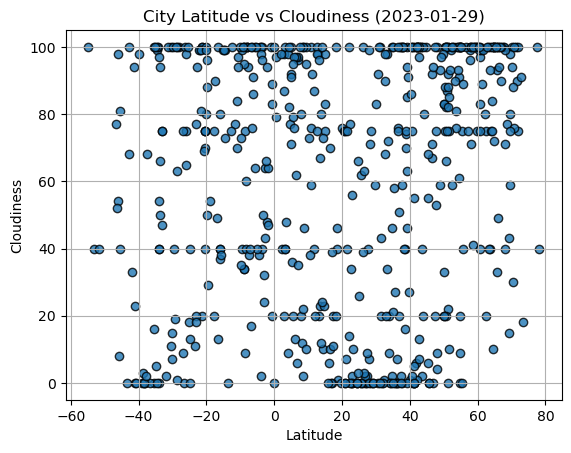

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x_axis_lats = clean_cities_df['Lat']
y_axis_cloudiness = clean_cities_df['Cloudiness']

plt.scatter(x_axis_lats,
            y_axis_cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
date_now = datetime.date(datetime.now())
plt.title(f'City Latitude vs Cloudiness ({date_now})')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

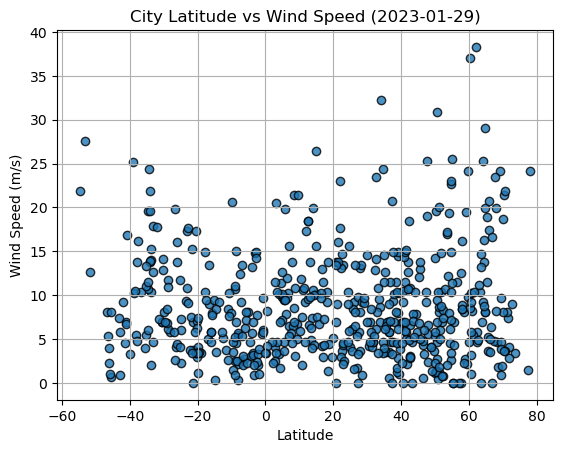

In [13]:
# Build the scatter plots for latitude vs. wind speed
x_axis_lats = clean_cities_df['Lat']
y_axis_wind_speed = clean_cities_df['Wind Speed']

plt.scatter(x_axis_lats,
            y_axis_wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
date_now = datetime.date(datetime.now())
plt.title(f'City Latitude vs Wind Speed ({date_now})')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [28]:
# Define a function to create Linear Regression plots
def drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, postion, figsize):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
#     print(f'slope : {slope}')
#     print(f'intercept : {intercept}')
#     print(f'rvalue : {rvalue}')
#     print(f'pvalue : {pvalue}')
#     print(f'stderr : {stderr}')

    regress_values = x_values * slope + intercept
#     print(f'regress_values: {regress_values}')

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     print(f'line_eq: {line_eq}')

    fig, ax = plt.subplots(figsize=figsize) 
    
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    plt.annotate(line_eq,(1,5),fontsize=19,color="red")
    plt.xlabel(xlabel, fontsize = 8)
    plt.ylabel(ylabel, fontsize = 8)
    title = f'{title} ({date_now})'
    plt.title(title, fontsize= 10)
    
    plt.show()

    print(f'The r-squared is: {rvalue**2}')
    correlation = st.pearsonr(x_values,y_values)
    print(f'The correlation between both factors is {round(correlation[0],2)}')

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = clean_cities_df[ clean_cities_df['Lat'] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,cherskiy,68.7500,161.3000,-14.40,98.0,77.0,1.77,RU,1.675011e+09
2,kodiak,57.7900,-152.4072,35.11,100.0,100.0,0.00,US,1.675011e+09
6,zalantun,48.0000,122.7167,-6.45,92.0,4.0,5.55,CN,1.675011e+09
7,sarakhs,36.5449,61.1577,42.89,49.0,76.0,3.58,IR,1.675011e+09
8,kapaa,22.0752,-159.3190,71.92,70.0,100.0,23.02,US,1.675011e+09


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = clean_cities_df[ clean_cities_df['Lat'] < 0 ]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,67.14,63.0,75.0,4.61,ZA,1.675011e+09
3,santa cruz,-17.8000,-63.1667,82.45,74.0,75.0,14.97,BO,1.675011e+09
4,rikitea,-23.1203,-134.9692,78.55,74.0,77.0,10.87,PF,1.675011e+09
5,kavieng,-2.5744,150.7967,82.54,76.0,64.0,7.78,PG,1.675011e+09
10,te anau,-45.4167,167.7167,49.89,63.0,81.0,0.63,NZ,1.675011e+09


###  Temperature vs. Latitude Linear Regression Plot

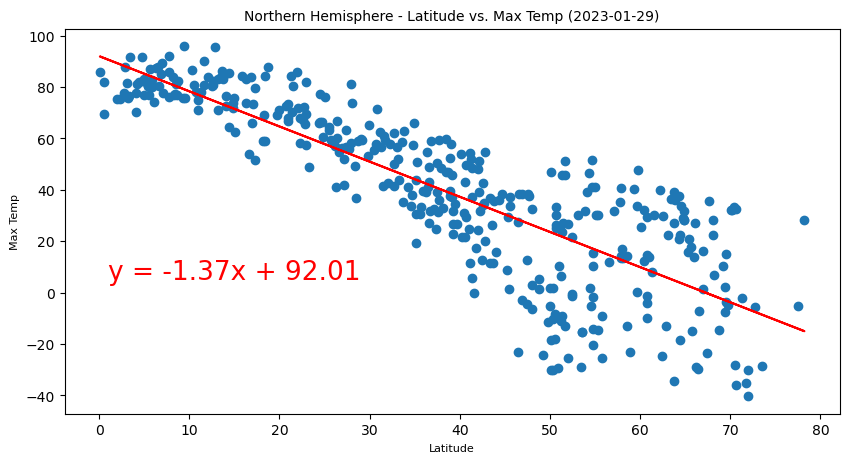

The r-squared is: 0.7007197336717609
The correlation between both factors is -0.84


In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Northern Hemisphere - Latitude vs. Max Temp'
postion = (1,5)
figsize = (10, 5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, postion, figsize)

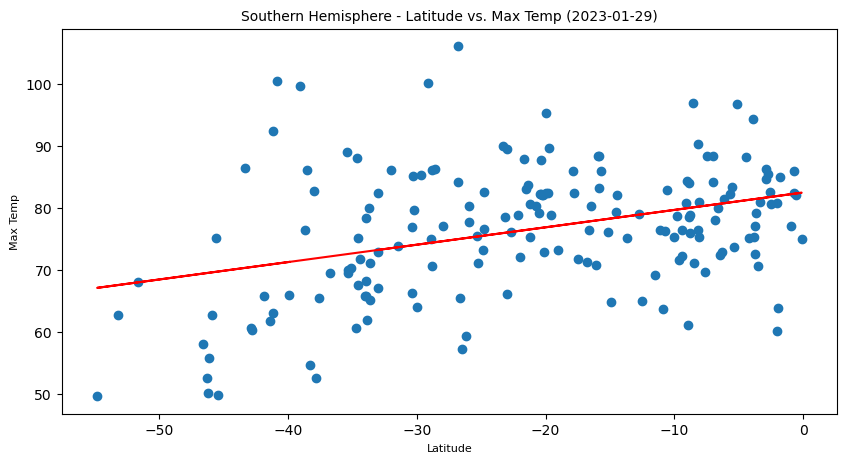

The r-squared is: 0.13654272548283075
The correlation between both factors is 0.37


In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
xlabel = 'Latitude'
ylabel = 'Max Temp'
title = 'Southern Hemisphere - Latitude vs. Max Temp'
postion = (1,5)
figsize = (10, 5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, postion, figsize)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

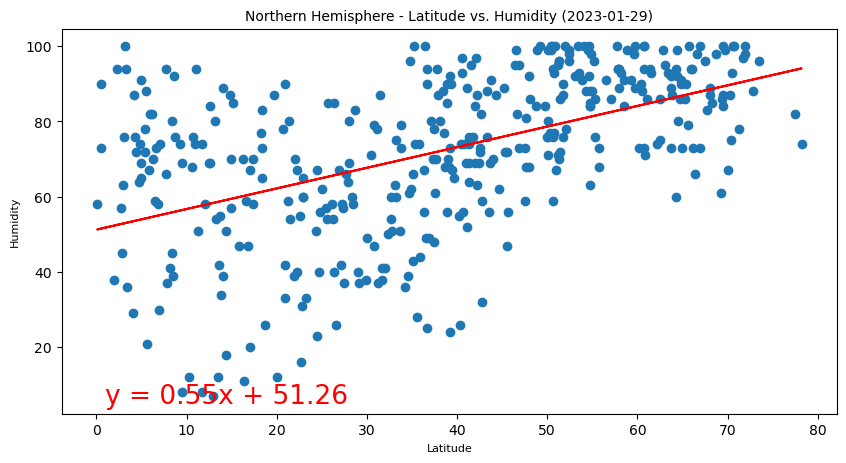

The r-squared is: 0.26293436449126173
The correlation between both factors is 0.51


In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Northern Hemisphere - Latitude vs. Humidity'
position = (45,20)
figsize = (10,5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, position, figsize)

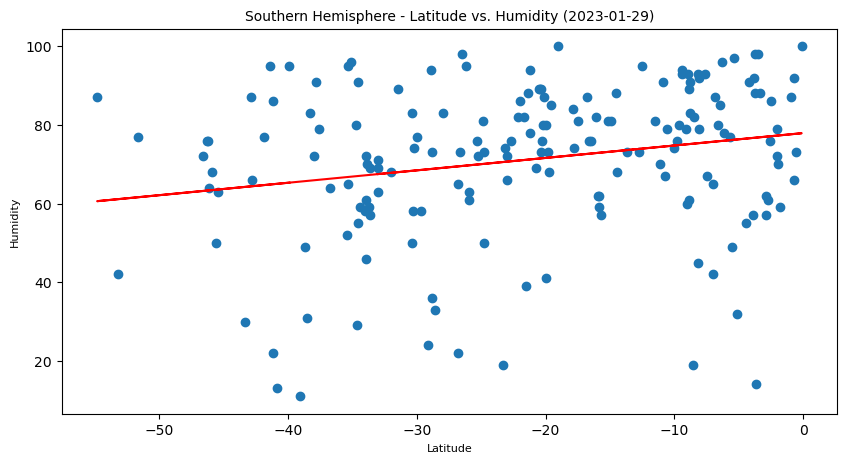

The r-squared is: 0.04906374932680476
The correlation between both factors is 0.22


In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
xlabel = 'Latitude'
ylabel = 'Humidity'
title = 'Southern Hemisphere - Latitude vs. Humidity'
position = (1,5)
figsize = (10,5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, position, figsize)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

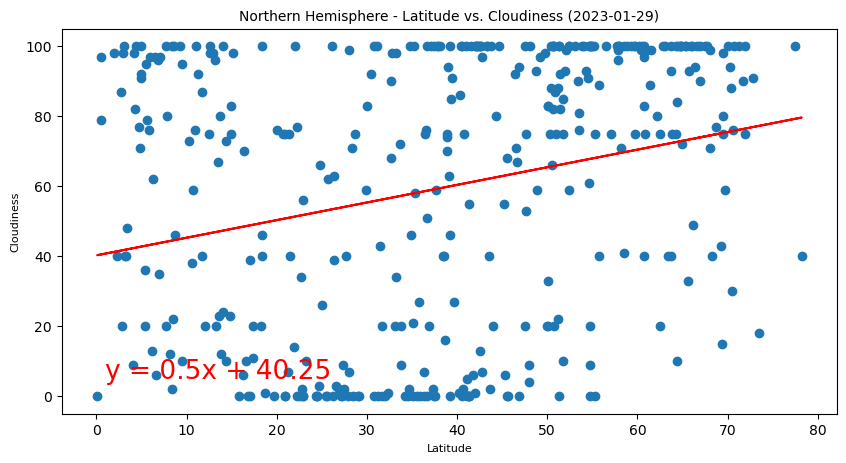

The r-squared is: 0.06781581786011515
The correlation between both factors is 0.26


In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Northern Hemisphere - Latitude vs. Cloudiness'
position = (45,20)
figsize = (10,5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, position, figsize)

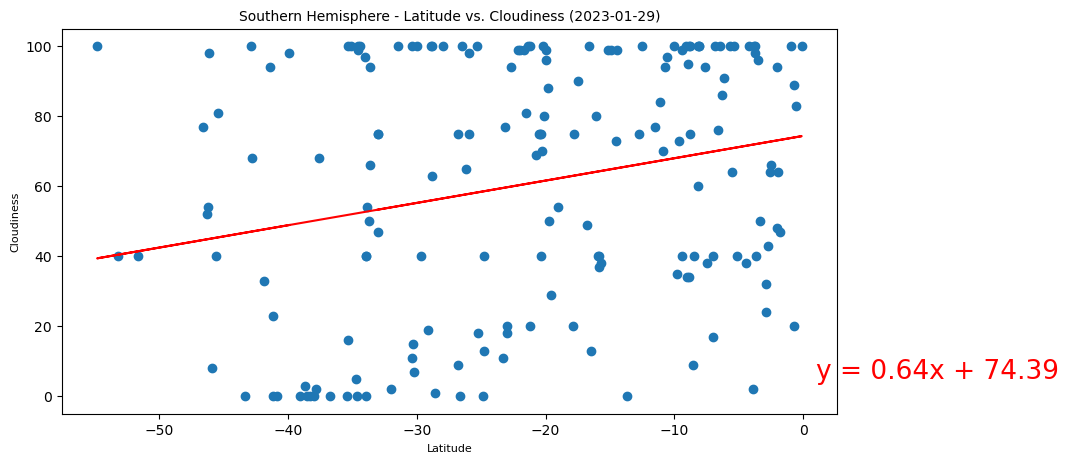

The r-squared is: 0.05989842619664712
The correlation between both factors is 0.24


In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
xlabel = 'Latitude'
ylabel = 'Cloudiness'
title = 'Southern Hemisphere - Latitude vs. Cloudiness'
position = (1,5)
figsize = (10,5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, position, figsize)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

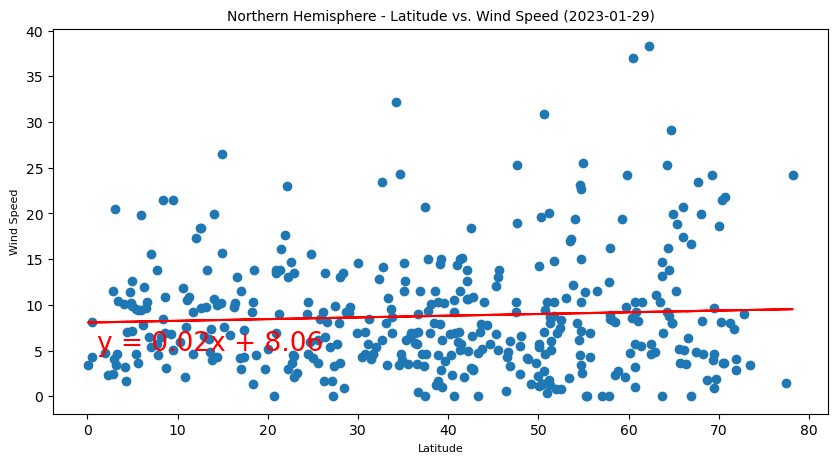

The r-squared is: 0.0034403216136138838
The correlation between both factors is 0.06


In [26]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Northern Hemisphere - Latitude vs. Wind Speed'
position = (45,20)
figsize = (10,5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, position, figsize)

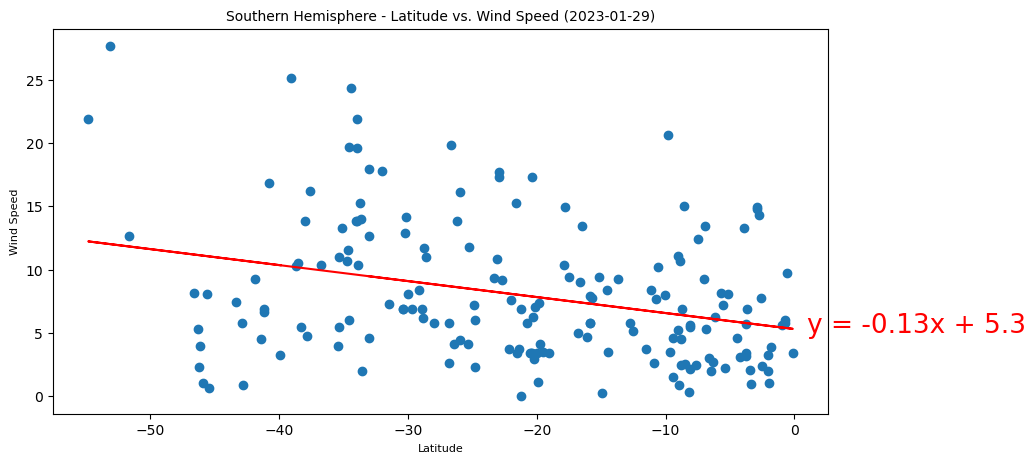

The r-squared is: 0.09941578605603789
The correlation between both factors is -0.32


In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
xlabel = 'Latitude'
ylabel = 'Wind Speed'
title = 'Southern Hemisphere - Latitude vs. Wind Speed'
position = (1,5)
figsize = (10,5)

drawRegressionPlots(x_values, y_values, xlabel, ylabel, title, position, figsize)

**Discussion about the linear relationship:** YOUR RESPONSE HERE